# Inspect Dataset

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

In [2]:
def make_circles(h, w, radius, centre):
    '''Create a single circle with the specified centre'''
    Y, X = np.ogrid[:h, :w]
    dist_from_center = np.sqrt((X - centre[1])**2 + (Y-centre[0])**2)
    mask = dist_from_center < radius

    return mask

In [3]:
def check_centre_distance(centre1, centre2, radius):
    dist_apart = np.sqrt((centre1[0]-centre2[0])**2 + (centre1[1]-centre2[1])**2)
    if dist_apart >= 2*radius:
        return True
    else:
        return False

In [4]:
def generate_centres(w, radius, ratio):
    centres = np.array([])
    # the number of centres generated depends on the pixel to image ratio
    total = int(ratio * (w/(2*radius))**2)
    for n in range(total):
        if len(centres) == 0:
            centres = np.random.randint(radius, w-radius, 2)
        else:
            new_centre = np.random.randint(radius, w-radius, 2)
            if centres.ndim == 1:
                while check_centre_distance(centres, new_centre, radius) == False:
                    new_centre = np.random.randint(radius, w-radius, 2)
            else:
                overlap = True
                count = 0
                while overlap == True:
                    for old_centre in centres:
                        if check_centre_distance(old_centre, new_centre, radius) == False:
                            count += 1
                    if count > 0:
                        new_centre = np.random.randint(radius, w-radius, 2)
                        count = 0
                    else:
                        overlap = False
            centres = np.vstack((centres,new_centre))
    return centres

In [5]:
x = np.zeros((1000,1000))
x_radius = 10

In [6]:
centres = generate_centres(x.shape[0],x_radius,0.4)
for centre in centres:
    x[make_circles(x.shape[0],x.shape[1],x_radius,centre)] = 1

KeyboardInterrupt: 

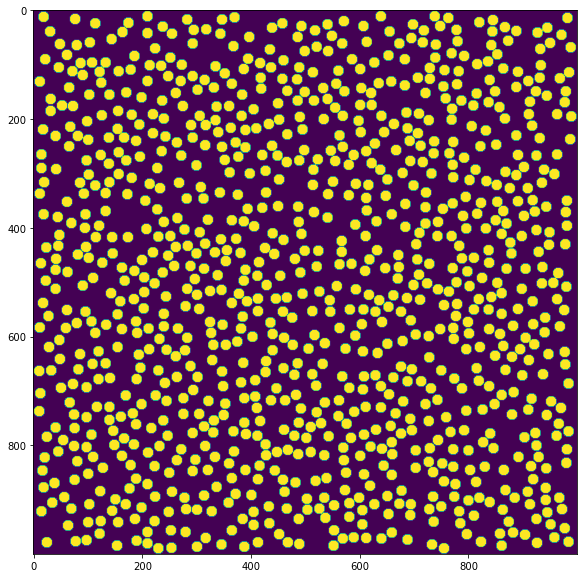

In [ ]:
figure(figsize=(10,10))
plt.imshow(x)
plt.savefig('small_random6')
plt.show()

In [ ]:
y = np.zeros((1000,1000))
y_radius = 20

In [ ]:
centres = generate_centres(y.shape[0],y_radius,0.4)
for centre in centres:
    y[make_circles(y.shape[0],y.shape[1],y_radius,centre)] = 1

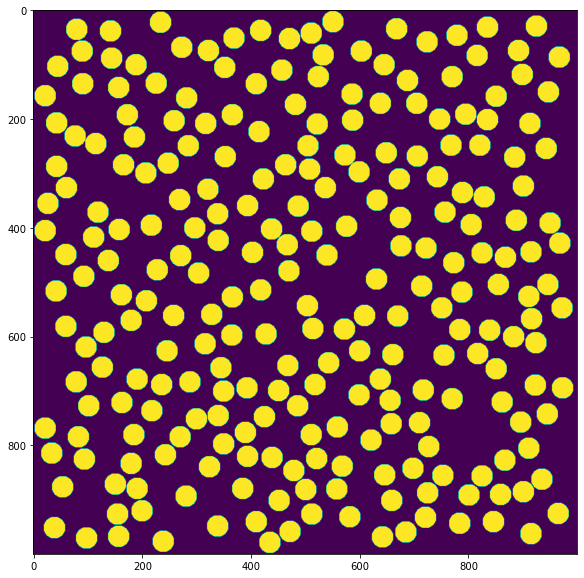

In [ ]:
figure(figsize=(10,10))
plt.imshow(y)
plt.savefig('big_random6')
plt.show()

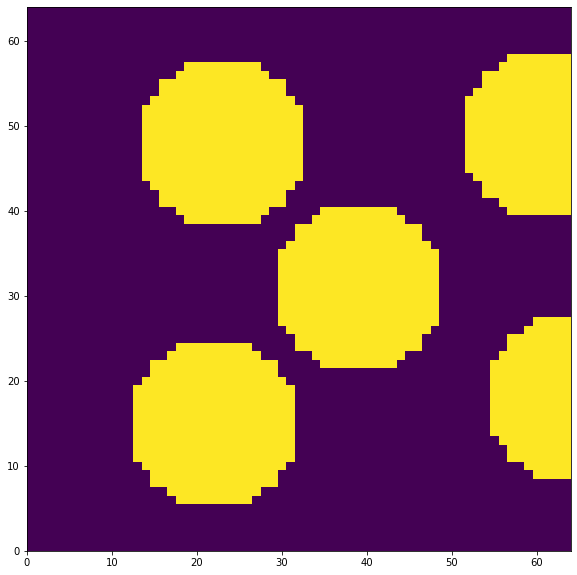

In [13]:
import os
import pickle
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

PATH = '/home/katiez/ML/conditional_gan_microstructure/code_files'

with open(PATH+'/data/r10.pkl', 'rb') as pickle_file:
    content = pickle.load(pickle_file)

for image in content:
    figure(figsize=(10,10))
    plt.imshow(image)
    plt.ylim(0,64)
    plt.xlim(0,64)
    plt.show()

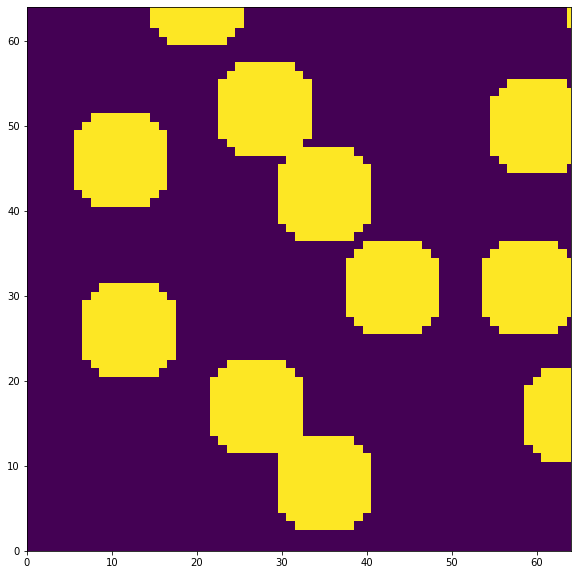

In [14]:
with open(PATH+'/data/r6.pkl', 'rb') as pickle_file:
    content = pickle.load(pickle_file)

for image in content:
    figure(figsize=(10,10))
    plt.imshow(image)
    plt.xlim(0,64)
    plt.ylim(0,64)
    plt.show()